In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import warnings
import time

start_time = time.time()
end_time = time.time()
run_time = end_time - start_time
print(f"代码运行时间: {run_time} 秒")
warnings.filterwarnings("ignore")

代码运行时间: 0.0 秒


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('cancerdata_feature.csv')
data = df.rename(columns={
    'Column1': 'radius1', 'Column2': 'texture1', 'Column3': 'perimeter1', 
    'Column4': 'area1', 'Column5': 'smoothness1', 'Column6': 'compactness', 
    'Column7': 'concavity1', 'Column8': 'concave_points1', 'Column9': 'symmetry1', 
    'Column10': 'fractal_dimension1', 'Column11': 'radius2', 'Column12': 'texture2', 
    'Column13': 'perimeter2', 'Column14': 'area2', 'Column15': 'smoothness2', 
    'Column16': 'compactness2', 'Column17': 'concavity2', 'Column18': 'concave_points2',
    'Column19': 'symmetry2', 'Column20': 'fractal_dimension2', 'Column21': 'radius3', 
    'Column22': 'texture3', 'Column23': 'perimeter3', 'Column24': 'area3', 
    'Column25': 'smoothness3', 'Column26': 'compactness3', 'Column27': 'concavity3', 
    'Column28': 'concave_points3', 'Column29': 'symmetry3', 'Column30': 'fractal_dimension3'
})

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)
y_df = pd.read_csv('cancerdata_Y.csv')

y_df['Y'] = y_df['Y'].replace({'B': 0, 'M': 1})

data_normalized['Y'] = y_df['Y']
data = data_normalized

X = data.iloc[:, :-1]
# X= (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 
Y = data.iloc[:, -1]
data

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Y
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,1
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,1
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,1
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,1


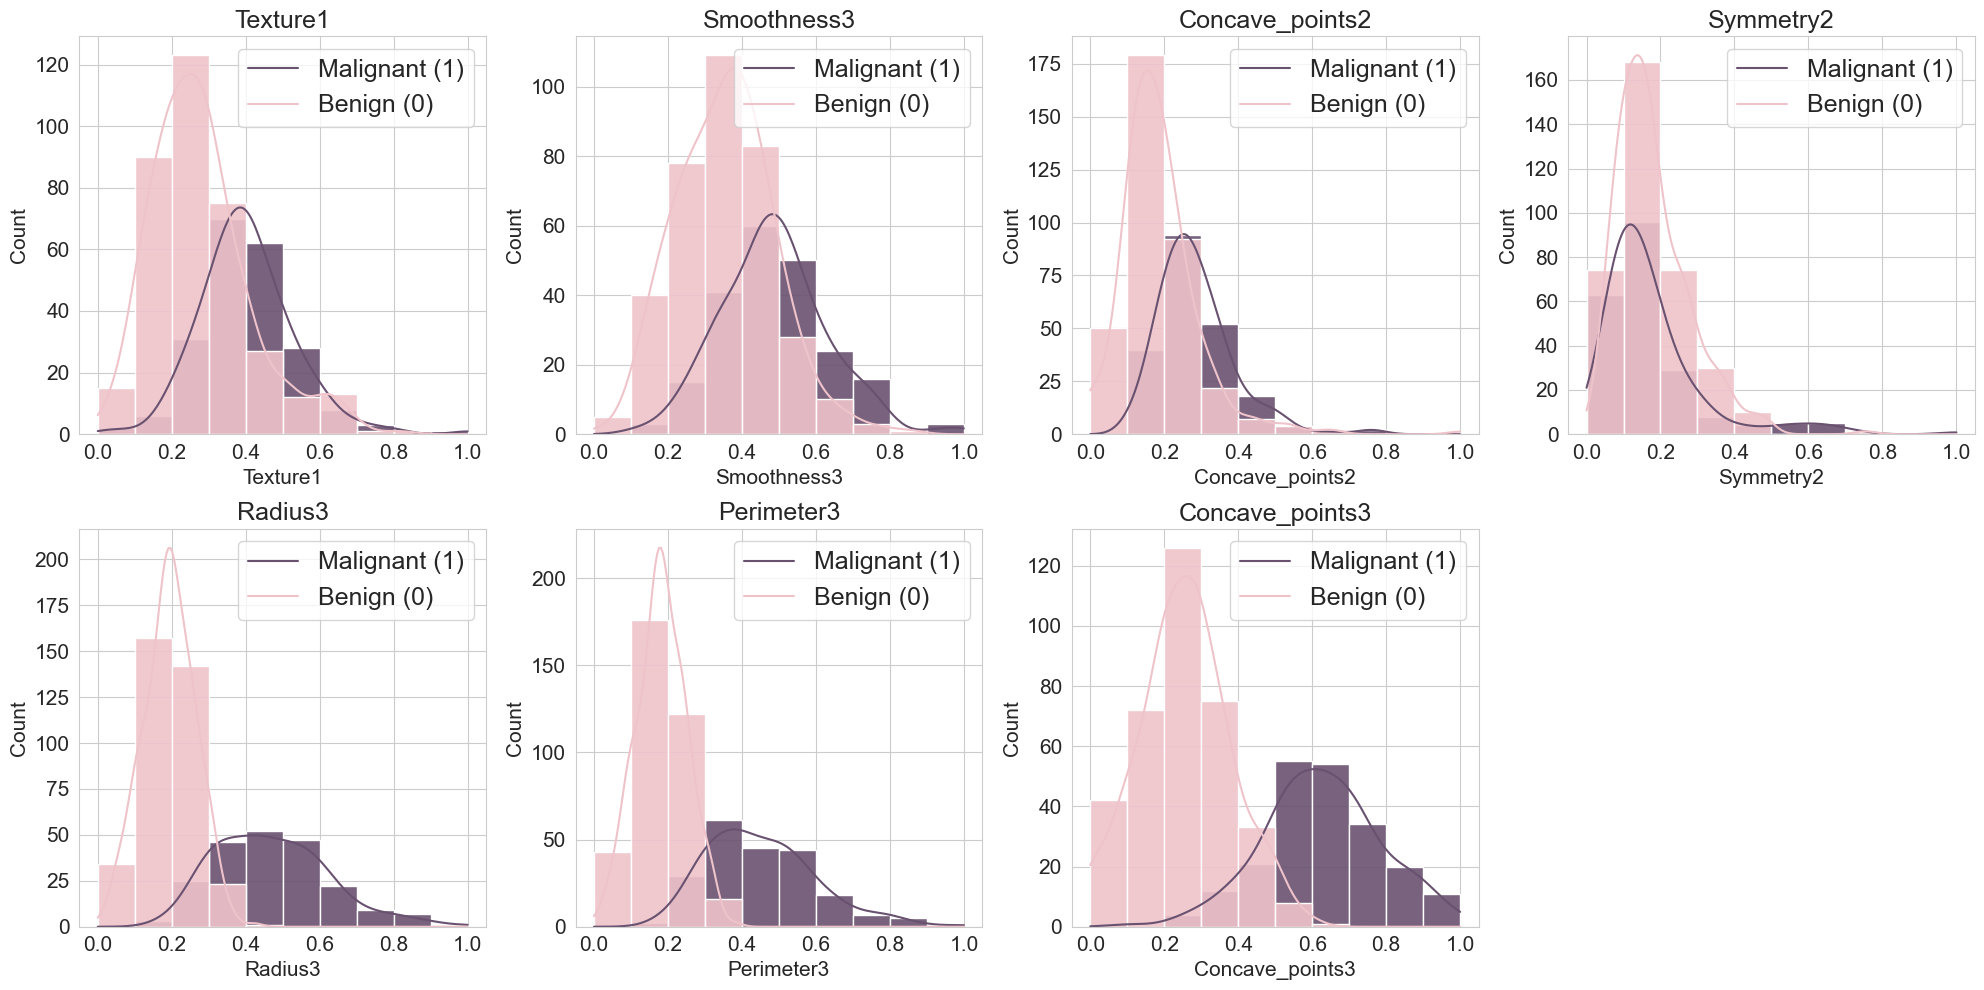

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")

colors = ['#EFC3CA', '#695170']  


# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
variables = ['texture1', 'smoothness3', 'concave_points2', 'symmetry2', 'radius3', 'perimeter3', 'concave_points3']

# Plot histograms
for i, var in enumerate(variables):
    row = i // 4
    col = i % 4 
    sns.histplot(data=data, x=var, hue='Y', bins=10, kde=True, common_norm=False, ax=axes[row, col], alpha=0.9, palette=colors)
    axes[row, col].set_title(f'{var.capitalize()}', fontsize=18)
    axes[row, col].set_xlabel(var.capitalize(), fontsize=15)
    axes[row, col].set_ylabel('Count', fontsize=15)
    axes[row, col].legend(labels=['Malignant (1)', 'Benign (0)'], fontsize=18)
    axes[row, col].tick_params(axis='both', labelsize=15)

# Remove empty subplots
for i in range(len(variables), 2 * 4):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.savefig('distribution.png')
plt.show()
